In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rule_index(triplet):
    L, C, R = triplet
    index = 7 - (4*L + 2*C + R)
    return int(index)

In [3]:
def CA_run(initial_state, n_steps, rule_number):
    rule_string = np.binary_repr(rule_number, 8)
    rule = np.array([int(bit) for bit in rule_string])

    m_cells = len(initial_state)
    CA_run = np.zeros((n_steps, m_cells))
    CA_run[0, :] = initial_state

    for step in range(1, n_steps):
        all_triplets = np.stack(
            [
                np.roll(CA_run[step - 1, :], 1),
                CA_run[step - 1, :],
                np.roll(CA_run[step - 1, :], -1),
            ]
        )
        CA_run[step, :] = rule[np.apply_along_axis(rule_index, 0, all_triplets)]

    return CA_run

In [4]:
def plot_CA_class(rule_list, class_label):
    rng = np.random.RandomState()
    fig, axs = plt.subplots(1, len(rule_list),figsize=(10, 3.5), constrained_layout=True)
    initial = rng.randint(0, 2, 100)

    for i, ax in enumerate(axs.ravel()):
        data = CA_run(initial, 100, rule_list[i])
        ax.set_title(f'Rule {rule_list[i]}')
        ax.matshow(data)
        ax.axis(False)

    fig.suptitle(class_label, fontsize=16)

    return fig, ax

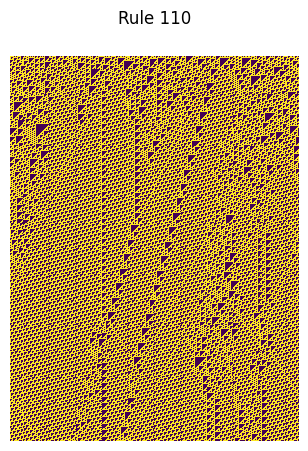

In [5]:
RULE=110
#initial = np.zeros(300)
#initial[300//2] = 1
initial = np.random.randint(0,2,300)
data = CA_run(initial, 400, RULE)

fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title(f'Rule {RULE}')
ax.matshow(data)
ax.axis(False);


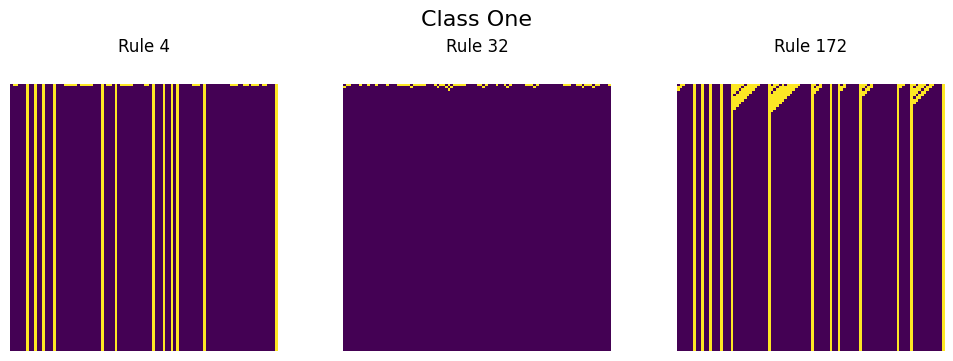

In [6]:
_ = plot_CA_class([4, 32, 172], 'Class One')

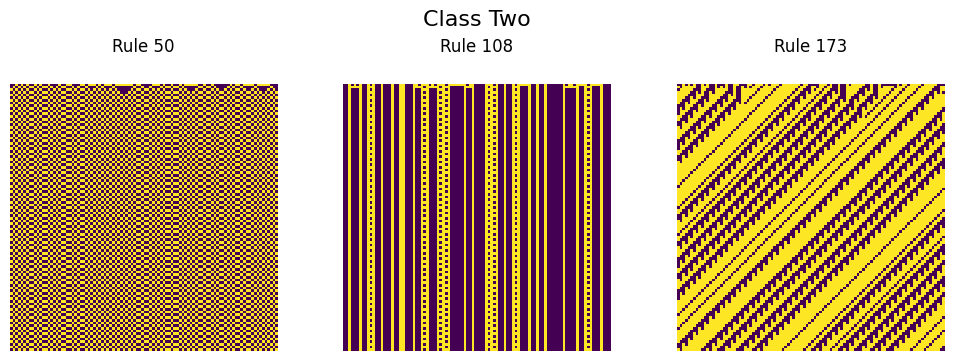

In [7]:
_ = plot_CA_class([50, 108, 173], 'Class Two')

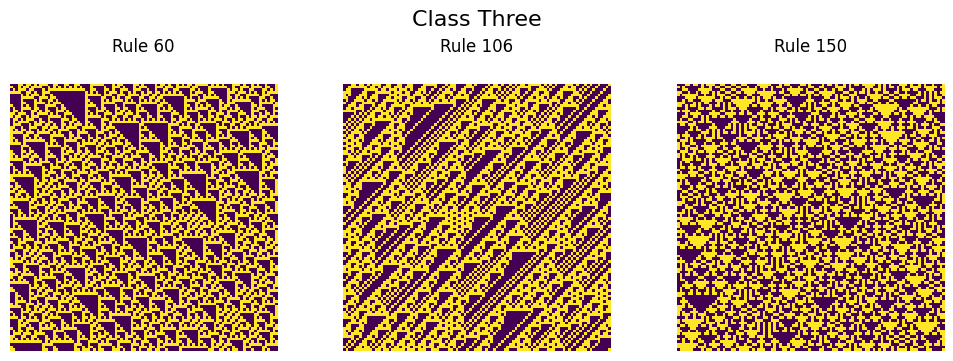

In [8]:
_ = plot_CA_class([60, 106, 150], 'Class Three')

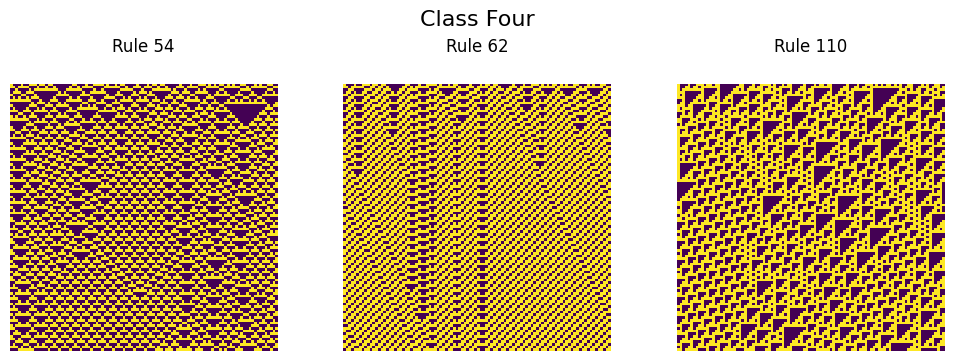

In [9]:
_ = plot_CA_class([54, 62, 110], 'Class Four')